In [2]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F
from scipy.stats import norm

In [3]:
x = np.arange(-50, 50, 1./3)
dx = x[1]-x[0]

In [4]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

<function matplotlib.pyplot.show>

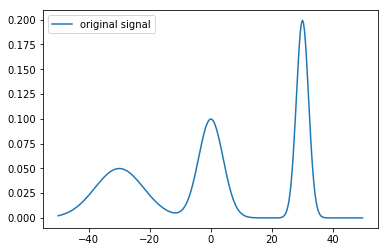

In [5]:
sig=gauss(x, 1., 0., 4.) + gauss(x, 1., -30, 8) + gauss(x, 1., 30, 2)
plt.figure() #plot the original signal
plt.plot(x,sig,label='original signal')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

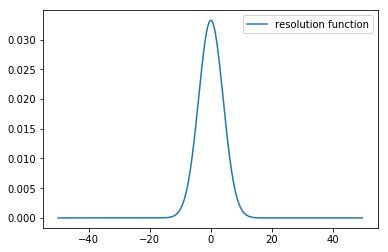

In [6]:
RF=gauss(x, 1., 0., 4)*dx
plt.figure() #plot the resolution function
plt.plot(x,RF,label='resolution function')
plt.legend()
plt.show 

In [7]:
S_=F.convolve(sig,RF,'same') #convolved signal 
Stest=np.convolve(sig,RF,'same')

<function matplotlib.pyplot.show>

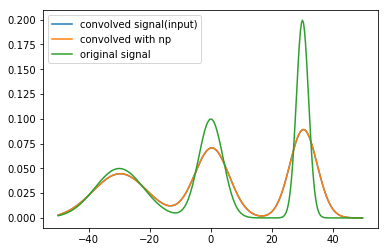

In [8]:
plt.figure() #plot the colvolved signal
plt.plot(x,S_,label='convolved signal(input)')
plt.plot(x,Stest,label='convolved with np')
plt.plot(x,sig,label='original signal')
plt.legend()
plt.show 

<function matplotlib.pyplot.show>

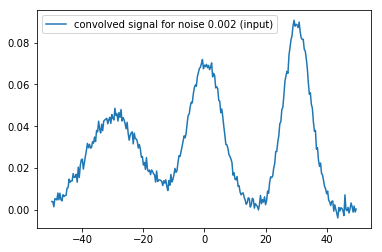

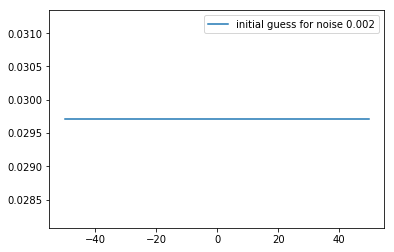

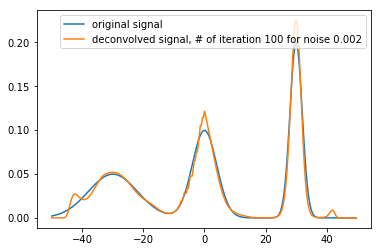

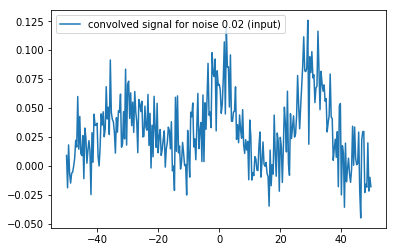

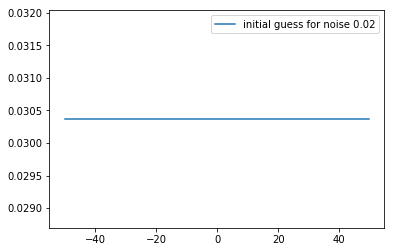

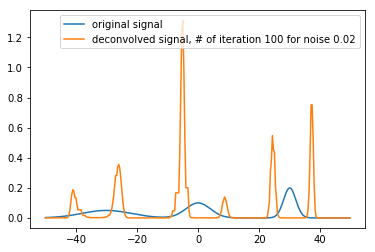

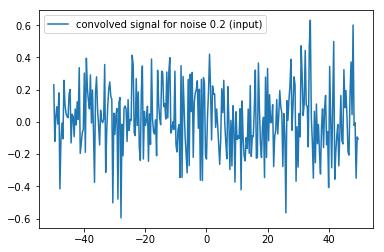

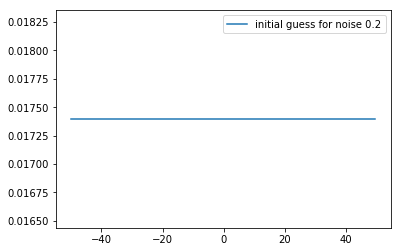

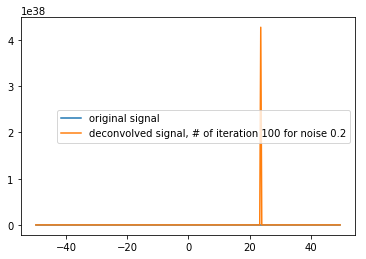

In [10]:

# Adding noise to the convolved signal (input)
noise=[0.002, 0.02, 0.2]

S=0.0* np.ones(len(x))
S_sum=0.0
ini=0.0 * np.ones(len(S))#initial guess
ini_C=0.0 * np.ones(len(S)) #convolved initial guess
ini_Csum=0.0 #summation of the convolved initial guess
chi_sq=0.0
I=0.0 * np.ones(len(S))  #deconvolved signal  

for n in noise:
    S=S_+ n * np.random.normal(size=len(x))

    S_sum=np.sum(S,0) #summation of the convolved signal

    ini=S_sum/len(S) * np.ones(len(S))#initial guess
    
    ini_C=F.convolve(ini,RF,'same') #convolved initial guess
    #print(ini_C.size) #print the convolved ini guess size


    ini_Csum=np.sum(ini_C,0) #summation of the convolved initial guess

    chi_sq=np.sum(np.divide(np.power(np.subtract(S, ini_C),2.),ini_C),0)

    #print('chi_sq {}'.format(chi_sq))

    plt.figure() #plot the colvolved signal after noise
    plt.plot(x,S,label='convolved signal for noise {} (input)'.format(n))
    plt.legend()
    #plt.show 

    plt.figure() #plot the initial guess
    plt.plot(x,ini, label='initial guess for noise {}'.format(n))
    plt.legend()
#plt.show

    g='same'
    no_iteration=100
    I=F.deconvolve(S,RF,ini,g,'iteration',no_iteration)  #deconvolved signal  


    plt.figure() #plot the original signal
    plt.plot(x,sig, label='original signal')
    plt.legend()
#plt.show
 
    plt.plot(x,I,label='deconvolved signal, # of iteration {} for noise {}'.format(no_iteration,n))#plot the deconvolved signal with originalsignal
    plt.legend()
plt.show  



